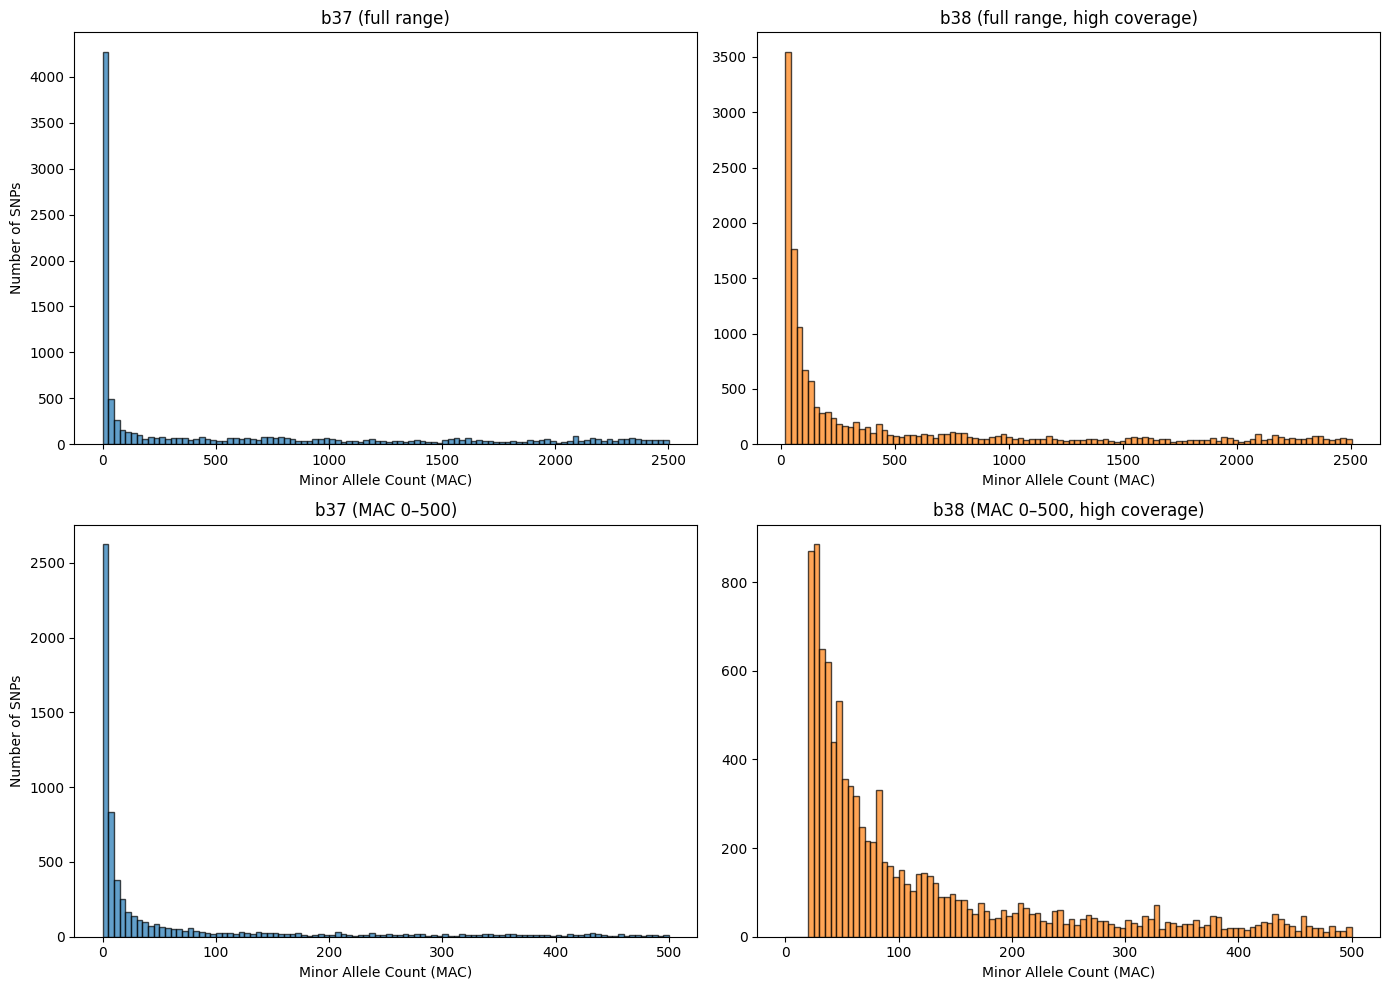

Saved full-range 1-MAC histogram table as ../mac_data.csv


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Input SNP files
file1 = "../10K_mac_maf.txt"
file2 = "../b38_mac_maf.txt"

# Load tables
df1 = pd.read_csv(file1, sep="\t")
df2 = pd.read_csv(file2, sep="\t")

# --- Make plots (2x2 grid) ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=False)

# Full range histograms
axes[0,0].hist(df1["mac"], bins=100, edgecolor="black", alpha=0.7, color="tab:blue")
axes[0,0].set_title("b37 (full range)")
axes[0,0].set_xlabel("Minor Allele Count (MAC)")
axes[0,0].set_ylabel("Number of SNPs")

axes[0,1].hist(df2["mac"], bins=100, edgecolor="black", alpha=0.7, color="tab:orange")
axes[0,1].set_title("b38 (full range, high coverage)")
axes[0,1].set_xlabel("Minor Allele Count (MAC)")

# Zoomed-in histograms (0–500)
axes[1,0].hist(df1["mac"], bins=100, range=(0,500), edgecolor="black", alpha=0.7, color="tab:blue")
axes[1,0].set_title("b37 (MAC 0–500)")
axes[1,0].set_xlabel("Minor Allele Count (MAC)")
axes[1,0].set_ylabel("Number of SNPs")

axes[1,1].hist(df2["mac"], bins=100, range=(0,500), edgecolor="black", alpha=0.7, color="tab:orange")
axes[1,1].set_title("b38 (MAC 0–500, high coverage)")
axes[1,1].set_xlabel("Minor Allele Count (MAC)")

plt.tight_layout()
plt.show()

# --- Function to make 1-MAC interval table ---
def make_mac_table(series, max_mac):
    """
    Returns a list of counts per MAC from 0 to max_mac.
    Each row is [MAC, count].
    """
    counts = np.zeros(max_mac+1, dtype=int)
    for mac in series:
        mac_int = int(mac)
        if mac_int <= max_mac:
            counts[mac_int] += 1
    rows = [[i, counts[i]] for i in range(max_mac+1)]
    return rows

# --- Full range table (1-MAC intervals) ---
full_max = int(max(df1["mac"].max(), df2["mac"].max()))
table1_full = make_mac_table(df1["mac"], full_max)
table2_full = make_mac_table(df2["mac"], full_max)

full_data = []
for i in range(full_max+1):
    full_data.append([i, table1_full[i][1], table2_full[i][1]])

df_full = pd.DataFrame(full_data, columns=["MAC", "b37", "b38"])
df_full.to_csv("../mac_data.csv", index=False, sep='\t')
print("Saved full-range 1-MAC histogram table as ../mac_data.csv")
